# Import Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [94]:
df = pd.read_excel("/content/Insurance_Fraud_Data_Case_Study.xlsx")

In [95]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [96]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [97]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,2002-02-08 04:40:47.999999872,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.140287,257063.005276,NaN,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861


In [98]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [99]:
df = df.replace('?', np.nan)

In [100]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


# Replace Missing value

In [101]:
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)
df['property_damage'].fillna('NO', inplace = True)
df['police_report_available'].fillna('NO', inplace = True)

/tmp/ipython-input-101-990754521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)
/tmp/ipython-input-101-990754521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [102]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [103]:
fraud_reported = df['fraud_reported'].value_counts()
fraud_reported

,count
fraud_reported,
N,753
Y,247


In [104]:
label_fraud = fraud_reported.index
count_fraud = fraud_reported.values

In [105]:
label_fraud

Index(['N', 'Y'], dtype='object', name='fraud_reported')

In [106]:
count_fraud

array([753, 247])

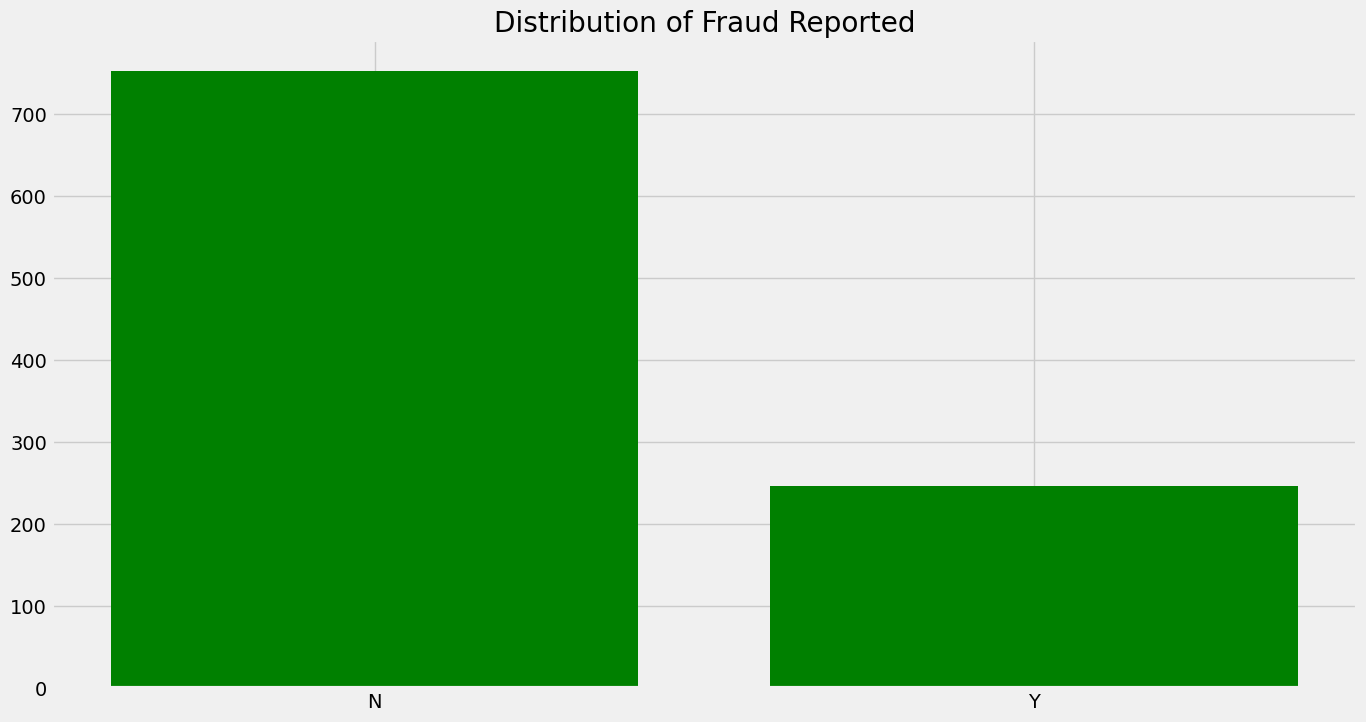

In [107]:
plt.bar(label_fraud, count_fraud, color = "g")
plt.title("Distribution of Fraud Reported")
plt.show()

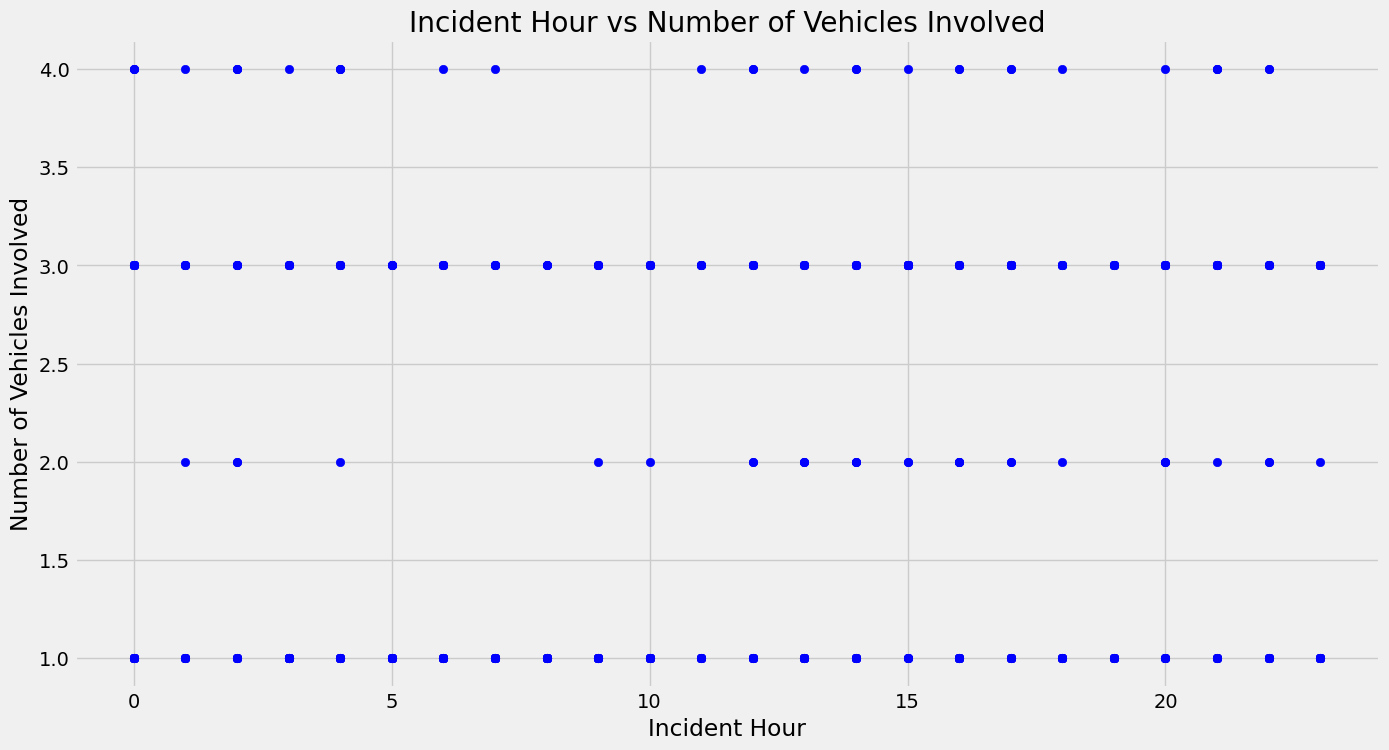

In [108]:
plt.scatter(df['incident_hour_of_the_day'], df['number_of_vehicles_involved'], color = "b")
plt.title("Incident Hour vs Number of Vehicles Involved")
plt.xlabel("Incident Hour")
plt.ylabel("Number of Vehicles Involved")
plt.show()

In [109]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

/tmp/ipython-input-110-3536466397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df["property_damage"], y = df['property_claim'], palette = "bone")


<Axes: xlabel='property_damage', ylabel='property_claim'>

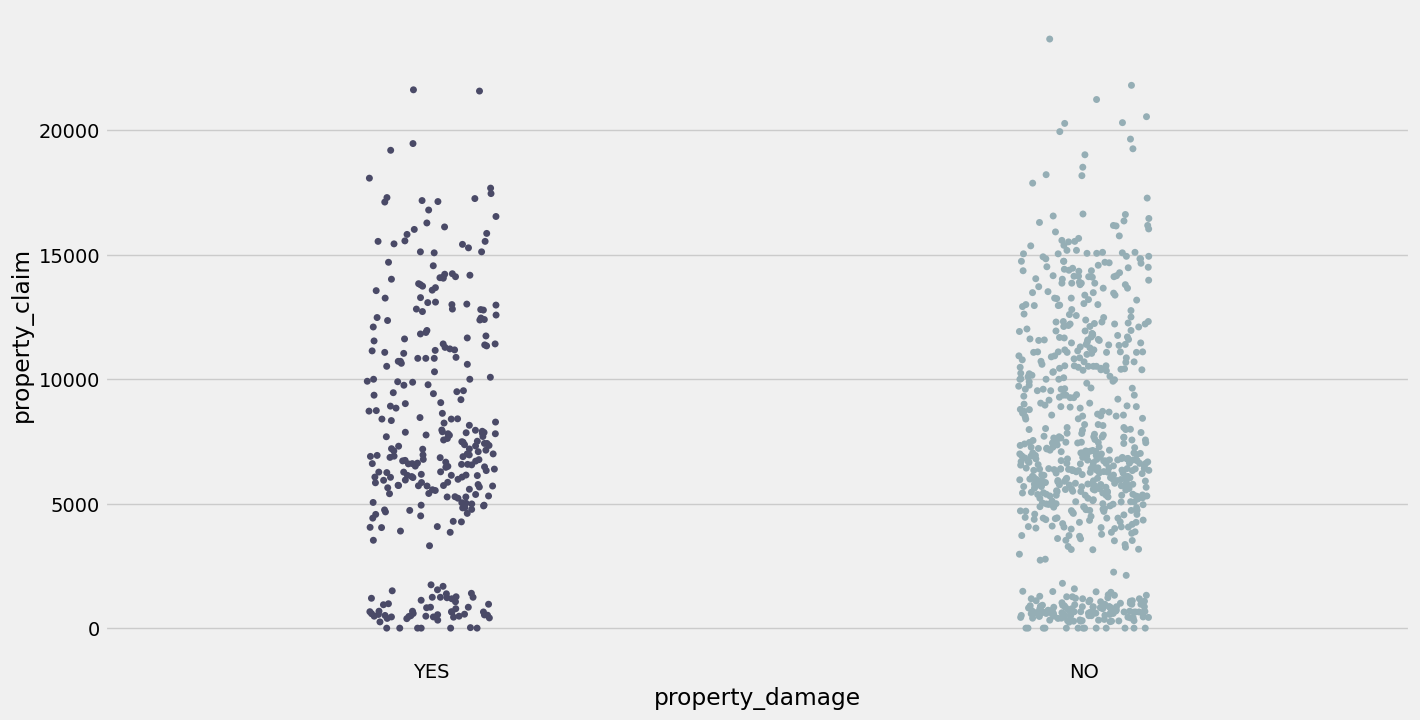

In [110]:
sns.stripplot(x=df["property_damage"], y = df['property_claim'], palette = "bone")

/tmp/ipython-input-111-1650054652.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['incident_type'], y = df['vehicle_claim'], palette = "pink")


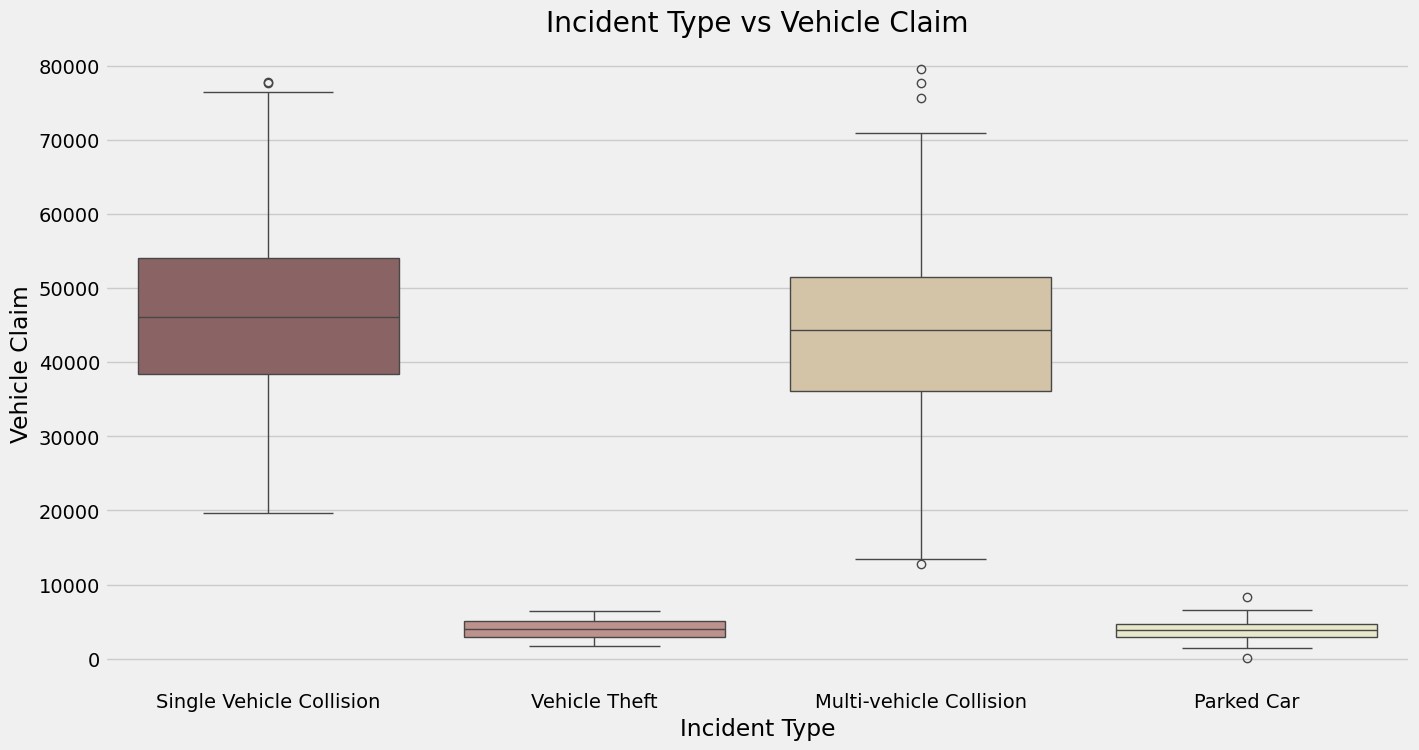

In [111]:
sns.boxplot(x=df['incident_type'], y = df['vehicle_claim'], palette = "pink")
title = "Incident Type vs Vehicle Claim"
plt.title(title)
plt.xlabel("Incident Type")
plt.ylabel("Vehicle Claim")
plt.show()

In [112]:
incident = pd.crosstab(df['incident_type'], df['fraud_reported'])
incident

fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,305,114
Parked Car,76,8
Single Vehicle Collision,286,117
Vehicle Theft,86,8


In [113]:
import matplotlib.pyplot as plt

plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

In [114]:
incident = pd.crosstab(df['incident_city'], df['incident_type'])
incident

incident_type,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
incident_city,,,,
Arlington,64,20,54,14
Columbus,68,8,61,12
Hillsdale,53,12,63,13
Northbend,68,15,53,9
Northbrook,40,7,59,16
Riverwood,56,10,55,13
Springfield,70,12,58,17


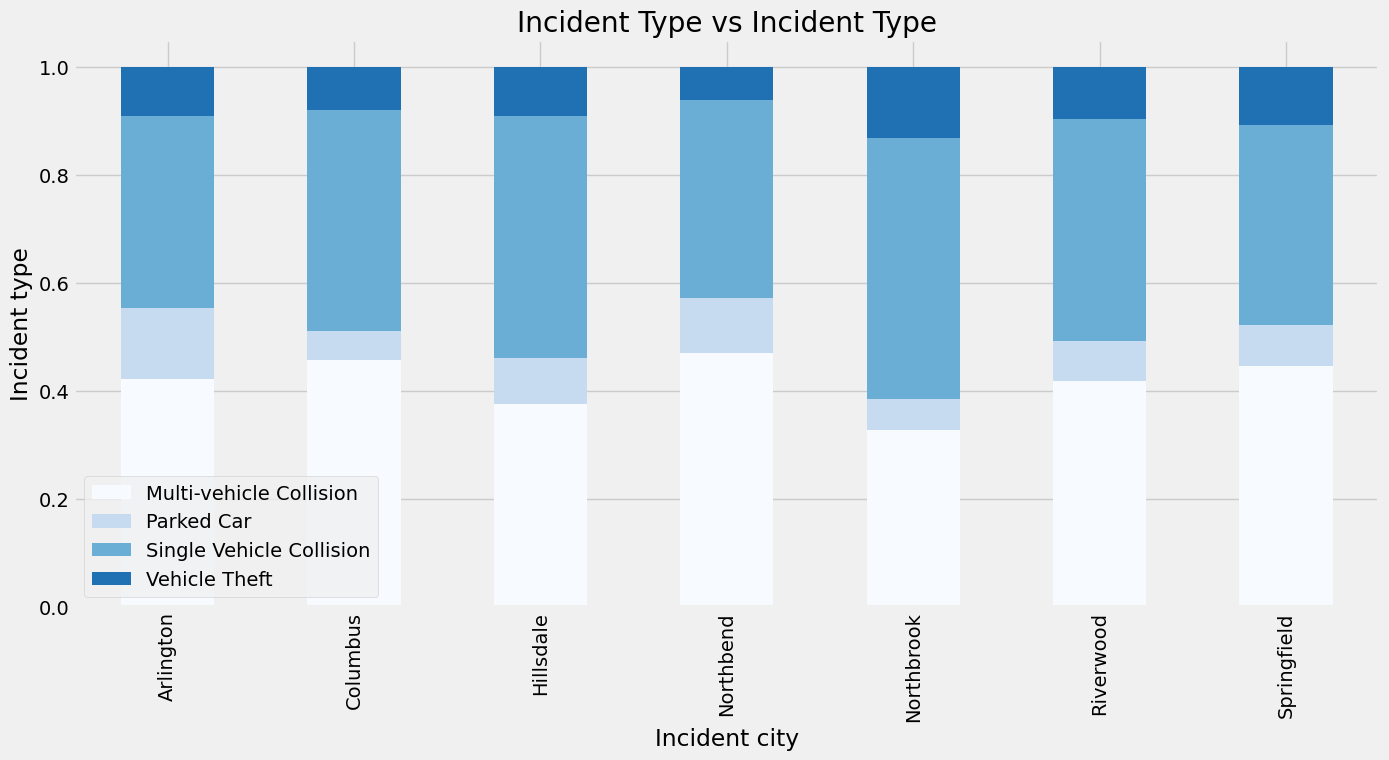

In [115]:
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (15,7), color = colors )

plt.title("Incident Type vs Incident Type")
plt.xlabel("Incident city")
plt.ylabel("Incident type")
plt.legend()
plt.show()

In [116]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
incident

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


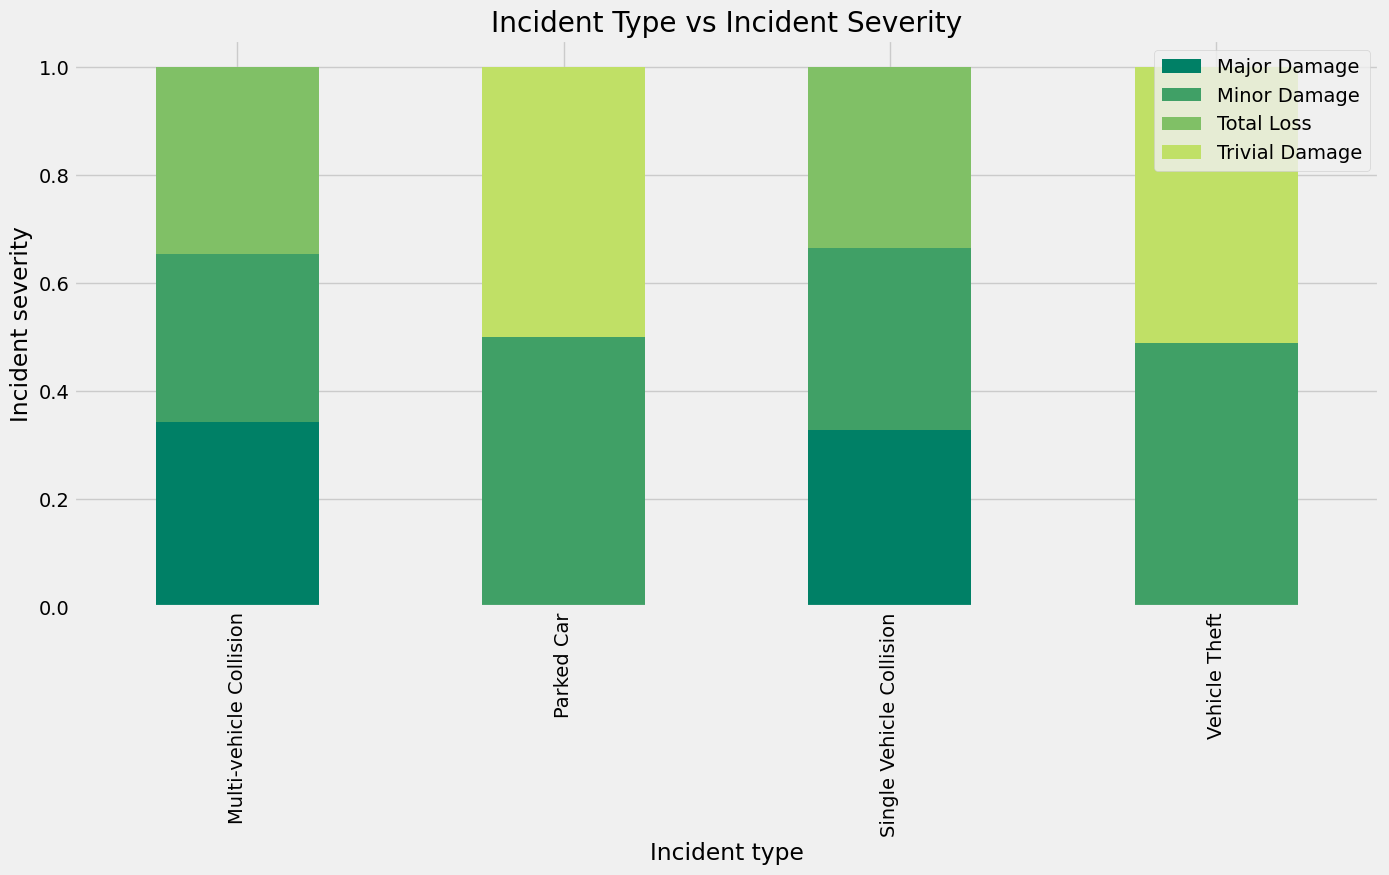

In [117]:
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (15,7), color = colors )

plt.title("Incident Type vs Incident Severity")
plt.xlabel("Incident type")
plt.ylabel("Incident severity")
plt.legend()
plt.show()

In [118]:
# Incident type vs collision type

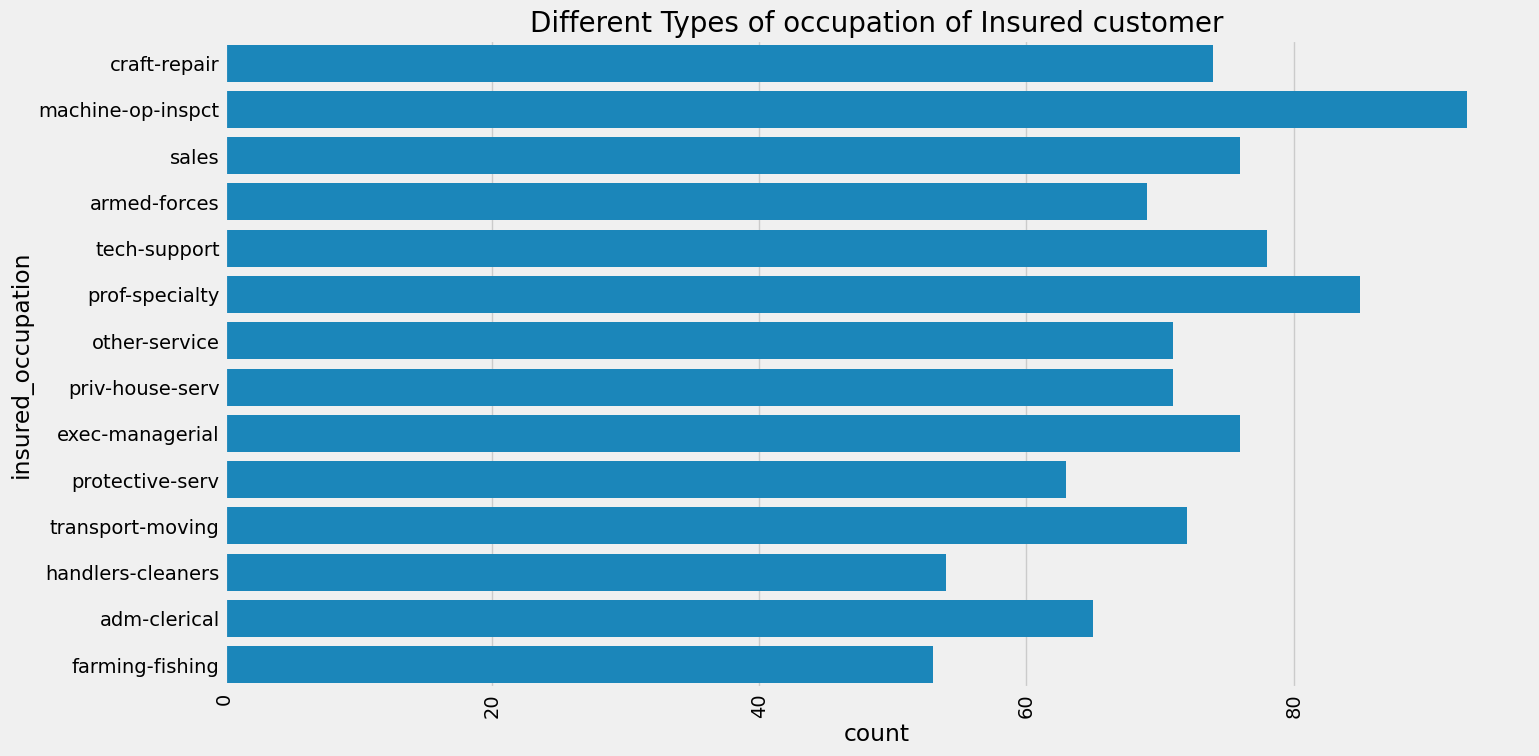

In [119]:
sns.countplot(df['insured_occupation'])
plt.title("Different Types of occupation of Insured customer", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


/tmp/ipython-input-120-1816020544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['insured_hobbies'], palette = 'cool')


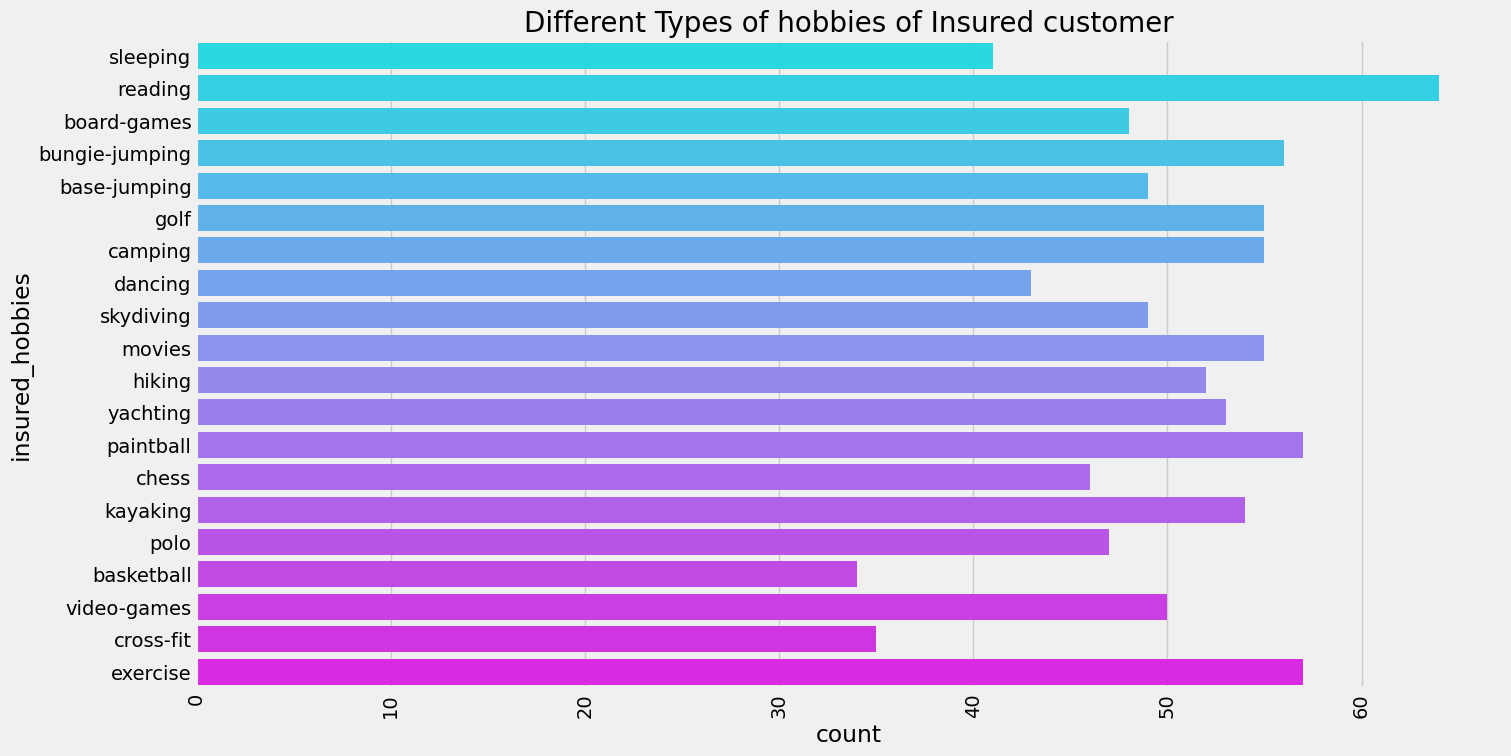

In [120]:
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title("Different Types of hobbies of Insured customer", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

/tmp/ipython-input-121-345007559.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['incident_type'], palette = 'spring')


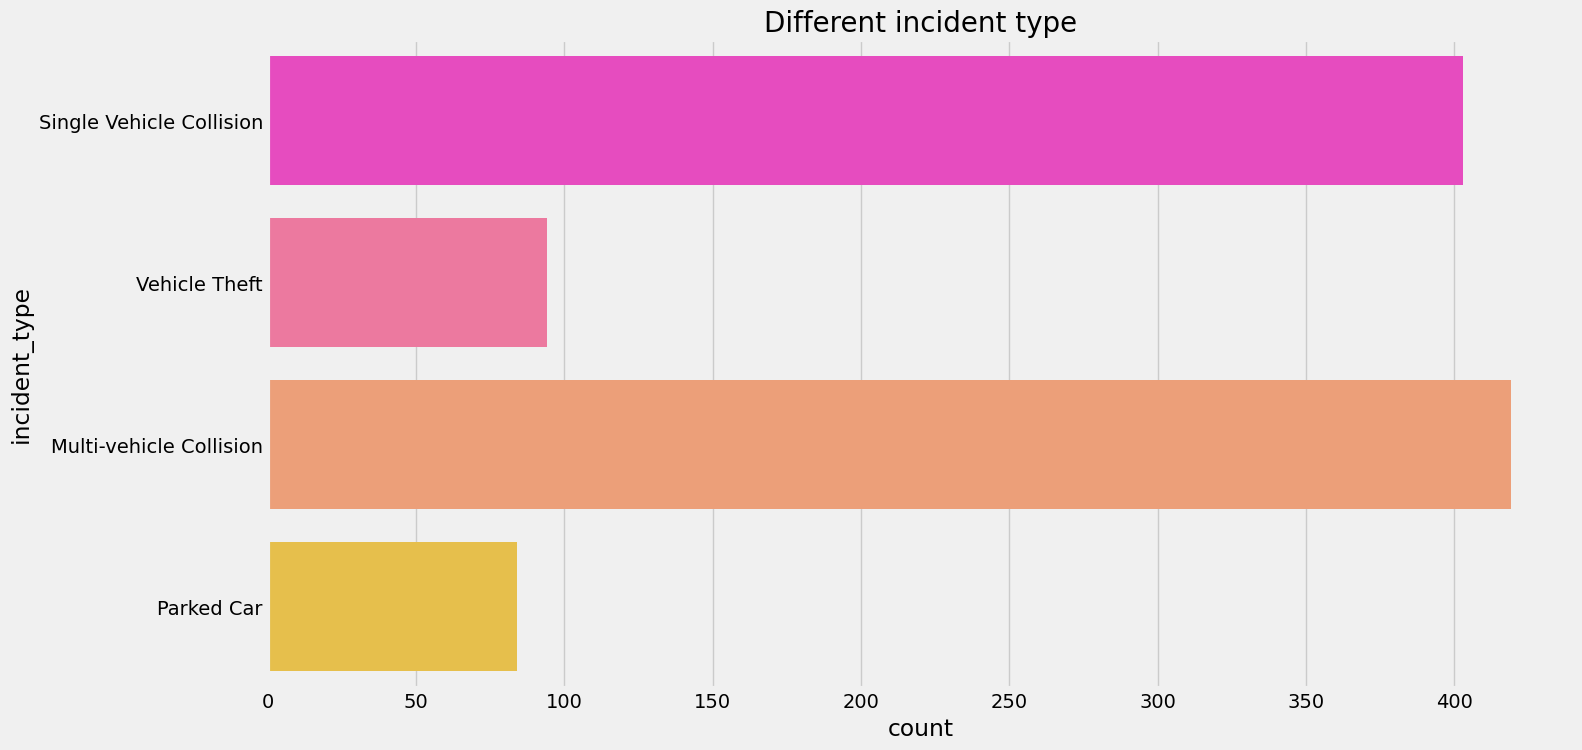

In [121]:
sns.countplot(df['incident_type'], palette = 'spring')
plt.title ("Different incident type", fontsize = 20)
plt.show()

/tmp/ipython-input-122-3126211226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df['policy_state'], y= df['total_claim_amount'], palette = 'copper')


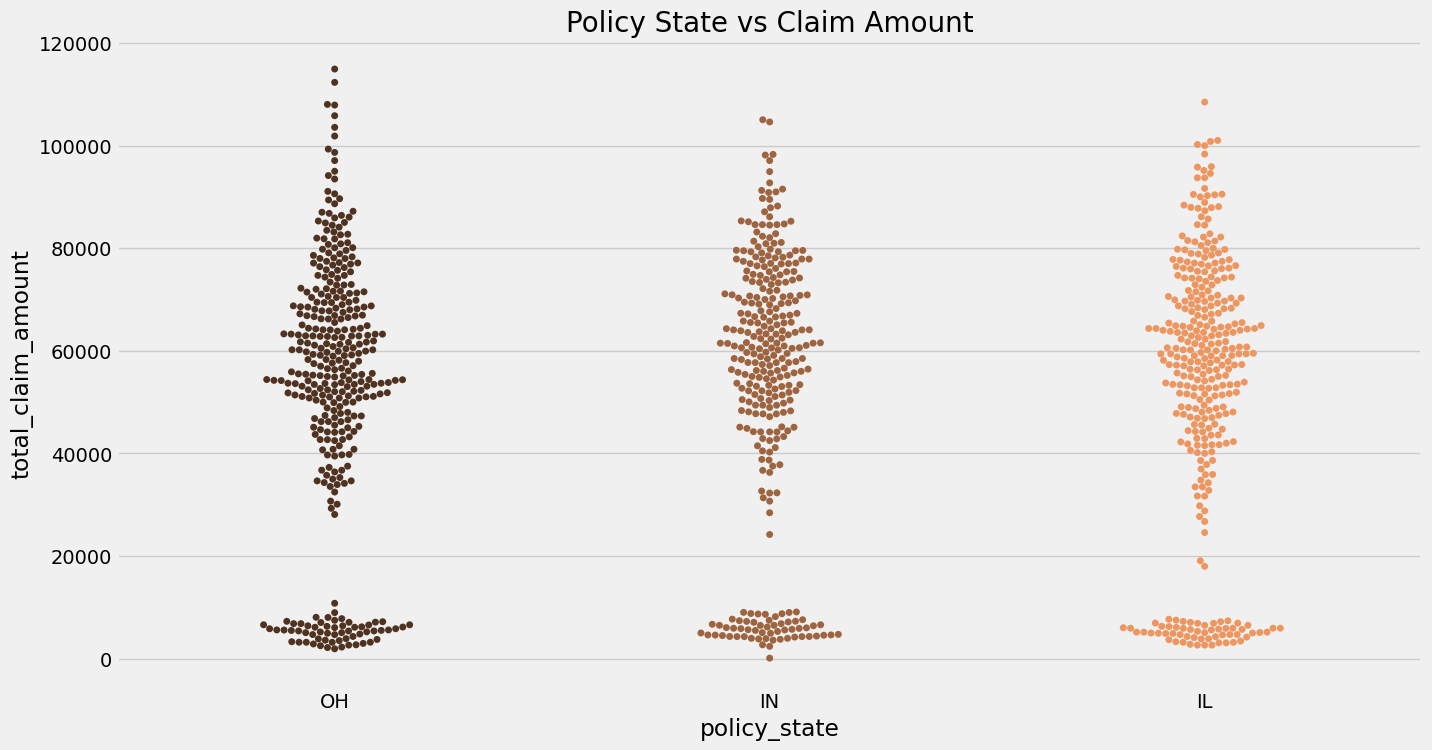

In [122]:
sns.swarmplot(x=df['policy_state'], y= df['total_claim_amount'], palette = 'copper')
plt.title("Policy State vs Claim Amount", fontsize = 20)
# plt.xticks(rotation = 90)
plt.show()

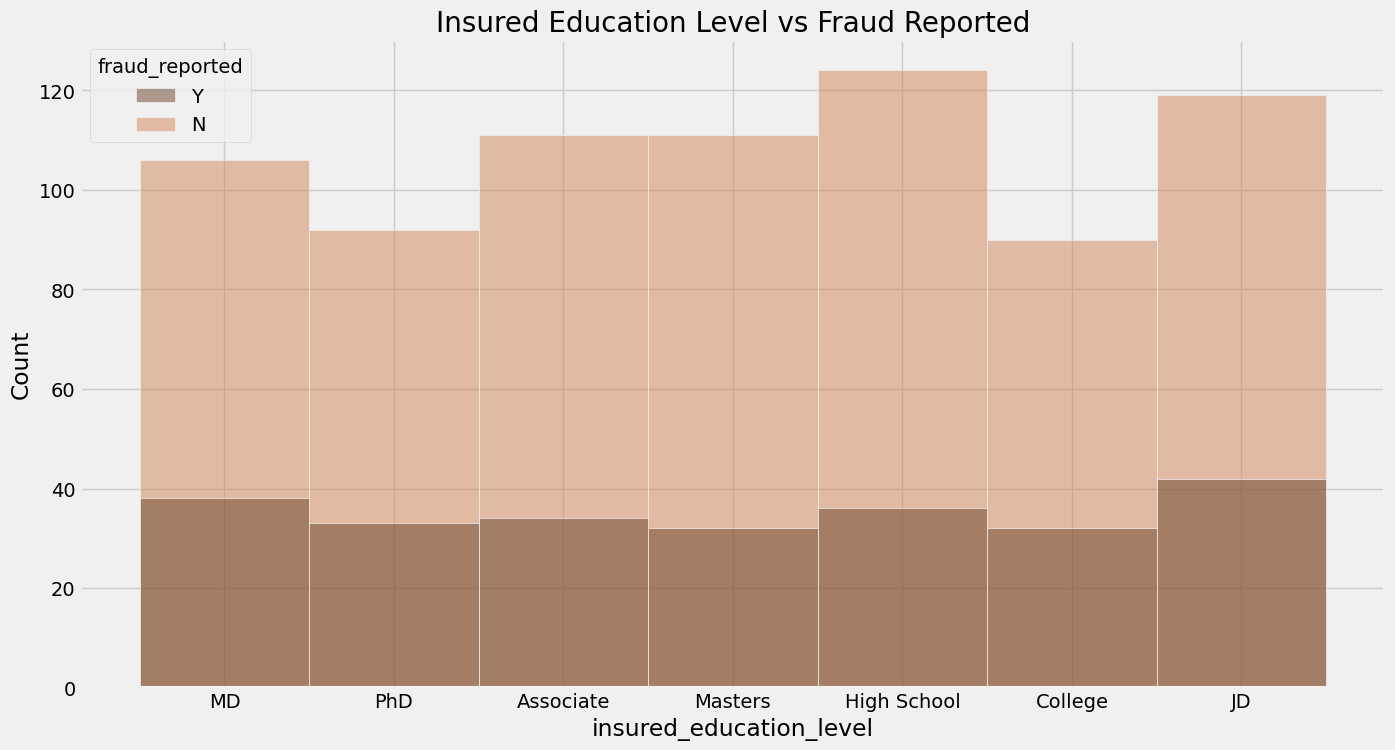

In [123]:
sns.histplot(df, x='insured_education_level', palette = 'copper', hue='fraud_reported')
plt.title("Insured Education Level vs Fraud Reported", fontsize = 20)
plt.show()

In [124]:
 df['policy_bind_date']

,policy_bind_date
0,2014-10-17
1,2006-06-27
2,2000-09-06
3,1990-05-25
4,2014-06-06
...,...
995,1991-07-16
996,2014-01-05
997,2003-02-17
998,2011-11-18


In [125]:
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})
# replace(('Y', 'N'), (0,1))
df['fraud_reported']

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [126]:
!pip install category_encoders

In [127]:
from category_encoders import TargetEncoder
# encoder = TargetEncoder

In [128]:
encoder = TargetEncoder()
df['auto_model'] = encoder.fit_transform(df['auto_model'], df['fraud_reported'])
df['auto_model']

,auto_model
0,0.273712
1,0.255191
2,0.318421
3,0.323632
4,0.196259
...,...
995,0.241614
996,0.267217
997,0.273500
998,0.321355


toyota -> 1

ford -> 0

honda -> 1

toyota -> 0

ford -> 0

honda ->1

toyota -> 1+0/2 = 0.5

ford ->0

honda -> 1

In [129]:
df['police_report_available'] = encoder.fit_transform(df['police_report_available'], df['fraud_reported'])
df['police_report_available']

,police_report_available
0,0.229299
1,0.255102
2,0.255102
3,0.255102
4,0.255102
...,...
995,0.255102
996,0.255102
997,0.229299
998,0.229299


In [130]:
df['property_damage'] = encoder.fit_transform(df['property_damage'], df['fraud_reported'])
df['property_damage']

,property_damage
0,0.258278
1,0.242120
2,0.242120
3,0.242120
4,0.242120
...,...
995,0.258278
996,0.258278
997,0.242120
998,0.242120


In [131]:
df['incident_city'] = encoder.fit_transform(df['incident_city'], df['fraud_reported'])
df['incident_city']

,incident_city
0,0.261745
1,0.223881
2,0.261745
3,0.289474
4,0.289474
...,...
995,0.221312
996,0.234483
997,0.289474
998,0.289474


In [132]:
df['incident_state'] = encoder.fit_transform(df['incident_state'], df['fraud_reported'])
df['incident_state']

,incident_state
0,0.294355
1,0.227275
2,0.221374
3,0.354870
4,0.221374
...,...
995,0.309083
996,0.294355
997,0.309083
998,0.221374


In [133]:
df['authorities_contacted'] = encoder.fit_transform(df['authorities_contacted'], df['fraud_reported'])
df['authorities_contacted']

,authorities_contacted
0,0.208904
1,0.208904
2,0.208904
3,0.208904
4,0.066083
...,...
995,0.269058
996,0.269058
997,0.208904
998,0.318182


In [134]:
df['incident_severity'] = encoder.fit_transform(df['incident_severity'], df['fraud_reported'])
df['incident_severity']

,incident_severity
0,0.605072
1,0.107345
2,0.107345
3,0.605072
4,0.107345
...,...
995,0.107345
996,0.605072
997,0.107345
998,0.605072


In [135]:
df['collision_type'] = encoder.fit_transform(df['collision_type'], df['fraud_reported'])
df['collision_type']

,collision_type
0,0.253623
1,0.227660
2,0.227660
3,0.275591
4,0.227660
...,...
995,0.275591
996,0.227660
997,0.253623
998,0.227660


In [136]:
df['incident_type'] = encoder.fit_transform(df['incident_type'], df['fraud_reported'])
df['incident_type']

,incident_type
0,0.290323
1,0.085205
2,0.272076
3,0.290323
4,0.085205
...,...
995,0.290323
996,0.290323
997,0.272076
998,0.290323


In [137]:
df['insured_sex'] = encoder.fit_transform(df['insured_sex'], df['fraud_reported'])
df['insured_sex']

,insured_sex
0,0.261339
1,0.261339
2,0.234637
3,0.234637
4,0.261339
...,...
995,0.234637
996,0.234637
997,0.234637
998,0.261339


In [138]:
df['incident_date'] = encoder.fit_transform(df['incident_date'], df['fraud_reported'])
df['incident_date']

,incident_date
0,2015-01-25
1,2015-01-21
2,2015-02-22
3,2015-01-10
4,2015-02-17
...,...
995,2015-02-22
996,2015-01-24
997,2015-01-23
998,2015-02-26


In [139]:
df['incident_hour_of_the_day'] = encoder.fit_transform(df['incident_hour_of_the_day'], df['fraud_reported'])
df['incident_hour_of_the_day']

,incident_hour_of_the_day
0,5
1,8
2,7
3,5
4,20
...,...
995,20
996,23
997,4
998,2


In [140]:
df['authorities_contacted'] = encoder.fit_transform(df['authorities_contacted'], df['fraud_reported'])

df['incident_severity'] = encoder.fit_transform(df['incident_severity'], df['fraud_reported'])

df['collision_type'] = encoder.fit_transform(df['collision_type'], df['fraud_reported'])

df['incident_type'] = encoder.fit_transform(df['incident_type'], df['fraud_reported'])

df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

df['incident_month'] = df['incident_date'].dt.month

df['incident_day'] = df['incident_date'].dt.day
df['insured_relationship'] = encoder.fit_transform(df['insured_relationship'], df['fraud_reported'])

df['insured_hobbies'] = encoder.fit_transform(df['insured_hobbies'], df['fraud_reported'])

df['insured_hobbies'] = encoder.fit_transform(df['insured_hobbies'], df['fraud_reported'])

df['insured_occupation'] = encoder.fit_transform(df['insured_occupation'], df['fraud_reported'])

df['insured_education_level'] = encoder.fit_transform(df['insured_education_level'], df['fraud_reported'])

df['insured_sex'] = encoder.fit_transform(df['insured_sex'], df['fraud_reported'])

df['policy_csl'] = encoder.fit_transform(df['policy_csl'], df['fraud_reported'])

df['policy_state'] = encoder.fit_transform(df['policy_state'], df['fraud_reported'])

df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

In [141]:
x1 = df.drop(['fraud_reported'], axis = 1)
y1 = df['fraud_reported']


* if you have two columns have a corre greater than or equals to thershold, one of them will be removed
* if a higher therhold (0.9) means only very strongly correlated columns are removed
* if a lower therhold (0.75) means moderately correlated columnbs will be removed

Correlation matrix
     a      b       c
  a  1      0.98   0.60
  b  0.98    1      0.65
  c 0.60     0.65   1


  if thershold = 0.9 -> remove the feature b
  if therhold = 0.7 -> b & c



  * small dataset -> use lower therhold (0.75-0.85)\
  * large -> 0.85-0.95


In [143]:
def correlation(dataset, threshold):
  col_corr = set()
  # Drop the 'auto_make' column before calculating the correlation matrix
  dataset = dataset.drop('auto_make', axis=1)
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) >= threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
        if colname in dataset.columns:
          del dataset[colname]
  return dataset

xnew = correlation(x1, 0.9)
xnew.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_year,incident_month,incident_day
0,328,0.258523,0.262108,1000,1406.91,0,466132,0.261339,0.263889,0.297071,...,0.258278,1,2,0.229299,71610,6510,13020,2004,1,25
1,228,0.254839,0.262108,2000,1197.22,5000000,468176,0.261339,0.263889,0.236566,...,0.242120,0,0,0.255102,5070,780,780,2007,1,21
2,134,0.258523,0.257880,2000,1413.14,5000000,430632,0.234637,0.264000,0.276208,...,0.242120,2,3,0.255102,34650,7700,3850,2007,2,22
3,256,0.227811,0.262108,2000,1415.74,6000000,608117,0.234637,0.264000,0.246381,...,0.242120,1,2,0.255102,63400,6340,6340,2014,1,10
4,228,0.227811,0.216667,1000,1583.91,6000000,610706,0.261339,0.234483,0.276208,...,0.242120,0,1,0.255102,6500,1300,650,2009,2,17


In [144]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xnew, y1, test_size = 0.25, random_state = 42)

<Axes: >

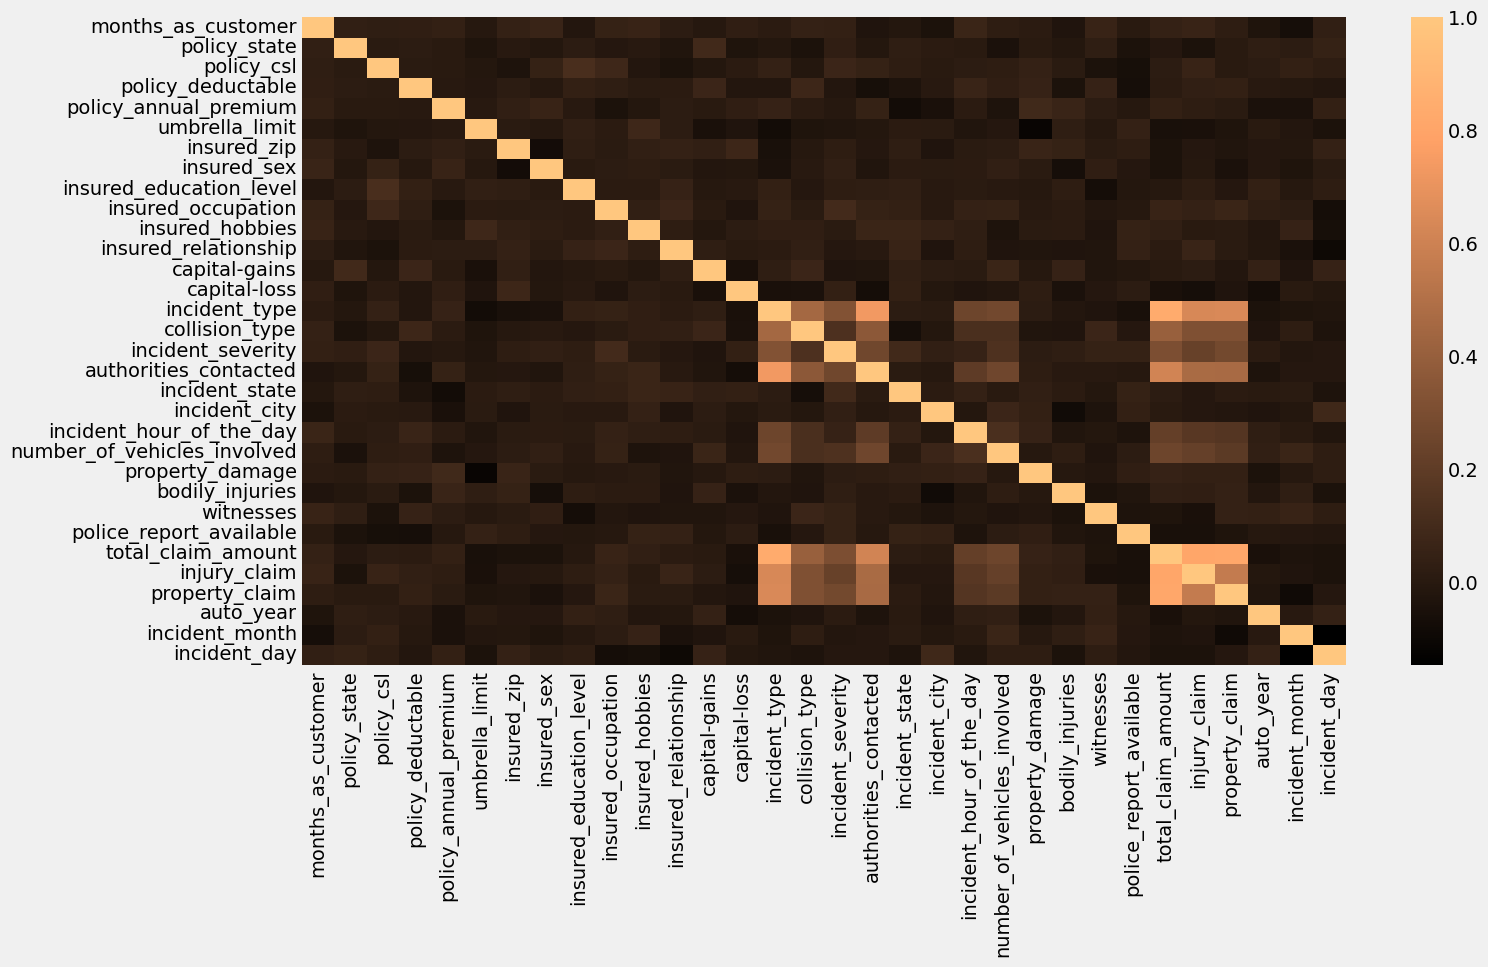

In [145]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(x_train.corr(), cmap = "copper")

In [146]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       183
           1       0.67      0.49      0.57        67

    accuracy                           0.80       250
   macro avg       0.75      0.70      0.72       250
weighted avg       0.79      0.80      0.79       250



In [147]:
model1 = GradientBoostingClassifier()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       183
           1       0.69      0.64      0.67        67

    accuracy                           0.83       250
   macro avg       0.78      0.77      0.78       250
weighted avg       0.82      0.83      0.83       250



In [148]:
# Random forest
print("Training Accuracy: ", model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.8


In [149]:
print("Training Accuracy: ", model1.score(x_train, y_train))
print("Testing Accuracy: ", model1.score(x_test, y_test))

Training Accuracy:  0.98
Testing Accuracy:  0.828
